In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 16})

Read the data set and assign as a data frame, df. Then, rename the feature as abbreviation.

In [3]:
df = pd.read_csv("DataAuto.csv")
df.columns = ["mpg", "cyl", "dis", "hor", "wei", "acc"]
features = df.columns[1:]

In [4]:
df.head()

,mpg,cyl,dis,hor,wei,acc
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


Examine the data such as data type, missing values.

In [5]:
df.dtypes

mpg    float64
cyl      int64
dis    float64
hor      int64
wei      int64
acc    float64
dtype: object

In [6]:
df.isna().sum()

mpg    0
cyl    0
dis    0
hor    0
wei    0
acc    0
dtype: int64

## Problem 1: Create empty data frame to record the Mean, Standard Deviation, and Range for each feature.

In [7]:
features_stat = df[["cyl", "dis", "hor", "wei", "acc"]].agg(["mean", "std", "max", "min"])
features_stat.loc["range", :] = features_stat.loc["max", :] - features_stat.loc["min", :]
features_stat.drop(["max", "min"], inplace = True)
features_stat

,cyl,dis,hor,wei,acc
mean,5.471939,194.411990,104.469388,2977.584184,15.541327
std,1.705783,104.644004,38.491160,849.402560,2.758864
range,5.000000,387.000000,184.000000,3527.000000,16.800000


## Problem 2: 
## 1. Plot the histogram of all the features separately in a row with normal density function with their mean and standard deviation as red curve.

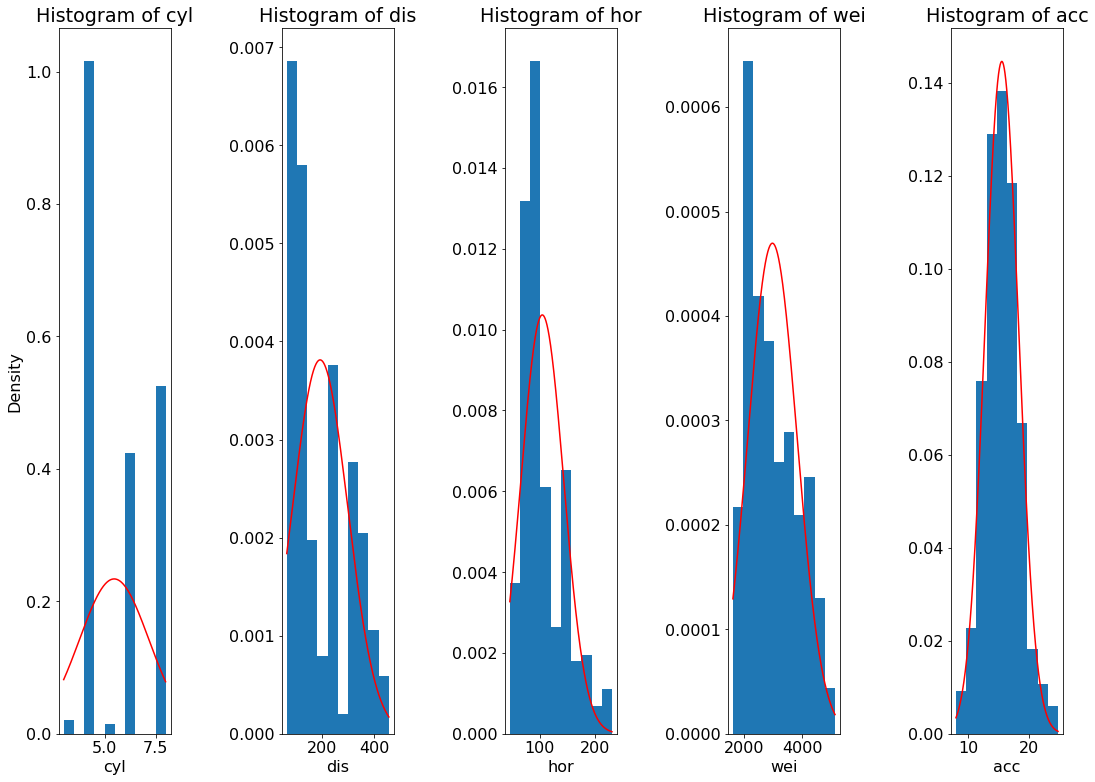

In [8]:
fig, axs = plt.subplots(1, 5)
for i in range(1, 6):
    axs[i - 1].hist(df.iloc[:, i], density = True)
    temp_x = np.arange(min(df.iloc[:, i]), max(df.iloc[:, i]), 0.01)
    axs[i - 1].plot(temp_x, norm.pdf(temp_x, features_stat.loc["mean", df.columns[i]], features_stat.loc["std", df.columns[i]]), color = "red")
    axs[i - 1].set_title("Histogram of " + df.columns[i])
    axs[i - 1].set_xlabel(df.columns[i])

axs[0].set_ylabel("Density")
fig.tight_layout(pad=3.0)
plt.show()

## 2. Plot the histogram of response variable i.e., mpg with normal density function with its mean and standard deviation as red curve.

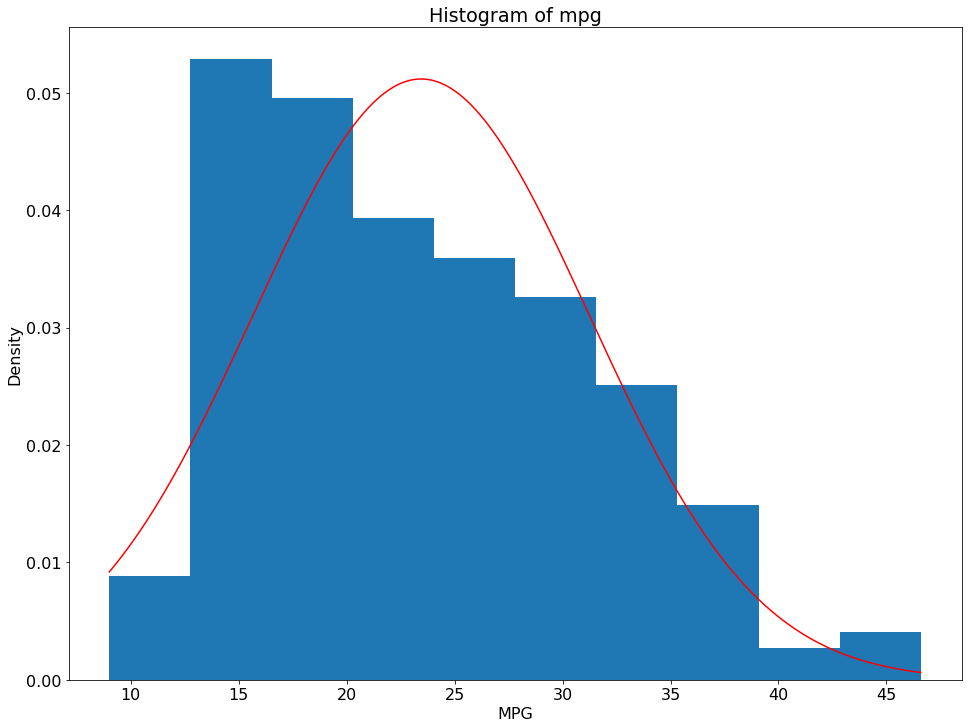

In [9]:
fig, ax = plt.subplots(1, 1)
ax.hist(df["mpg"], density = True)
temp_x = np.arange(min(df.loc[:, "mpg"]), max(df.loc[:, "mpg"]), 0.01)
ax.plot(temp_x, norm.pdf(temp_x, np.mean(df.loc[:, "mpg"]), np.std(df.loc[:, "mpg"])), color = "red")
ax.set_title("Histogram of mpg")
ax.set_ylabel("Density")
ax.set_xlabel("MPG")

plt.show()

## Problem 3: 
## 1. Plot the scatter plot of all the features versus mpg in a row.

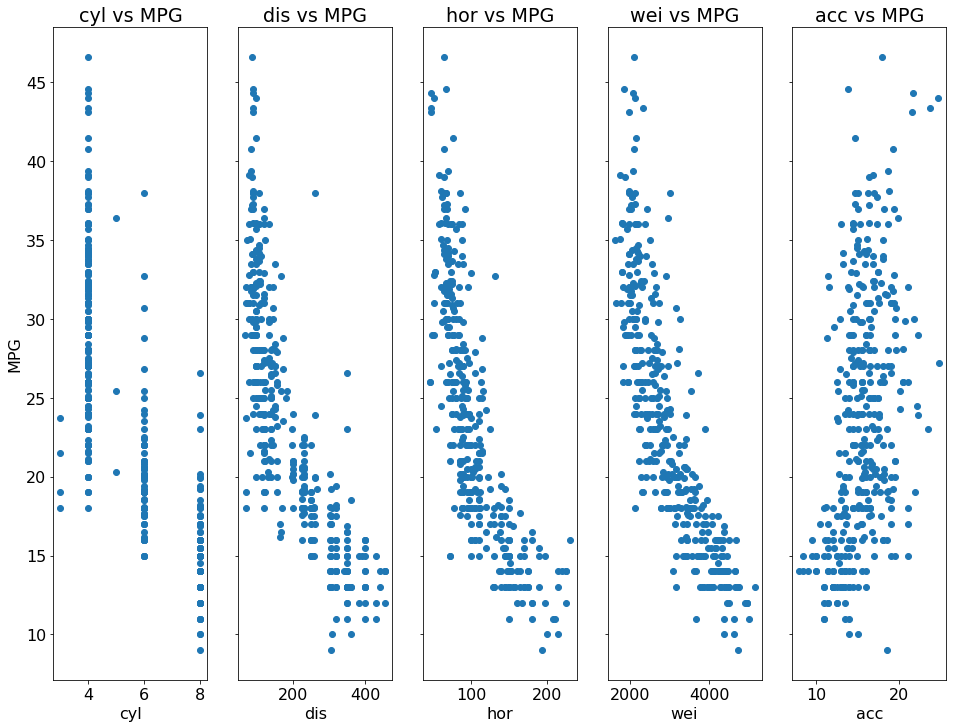

In [10]:
fig, axs = plt.subplots(1, 5, sharey = True)
for i in range(1, 6):
    feature = df.columns[i]
    axs[i - 1].scatter(df.loc[:, feature], df.iloc[:, 0])
    axs[i - 1].set_title(feature + " vs MPG")
    axs[i - 1].set_xlabel(feature)

axs[0].set_ylabel("MPG")
plt.show()

## 2. Create an empty df to record correlation between each features with respect to MPG.

In [11]:
CORR_mpg = round(df.corrwith(df["mpg"]), 2)
CORR_mpg.to_frame(name = "mpg")

,mpg
mpg,1.00
cyl,-0.78
dis,-0.81
hor,-0.78
wei,-0.83
acc,0.42


## Problem 4: Generate correlation matrix for all the features.

In [12]:
CORR = round(df.corr(), 2)
CORR

,mpg,cyl,dis,hor,wei,acc
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42
cyl,-0.78,1.00,0.95,0.84,0.90,-0.50
dis,-0.81,0.95,1.00,0.90,0.93,-0.54
hor,-0.78,0.84,0.90,1.00,0.86,-0.69
wei,-0.83,0.90,0.93,0.86,1.00,-0.42
acc,0.42,-0.50,-0.54,-0.69,-0.42,1.00


## Problem 5: Plot the Percentiles of MPG

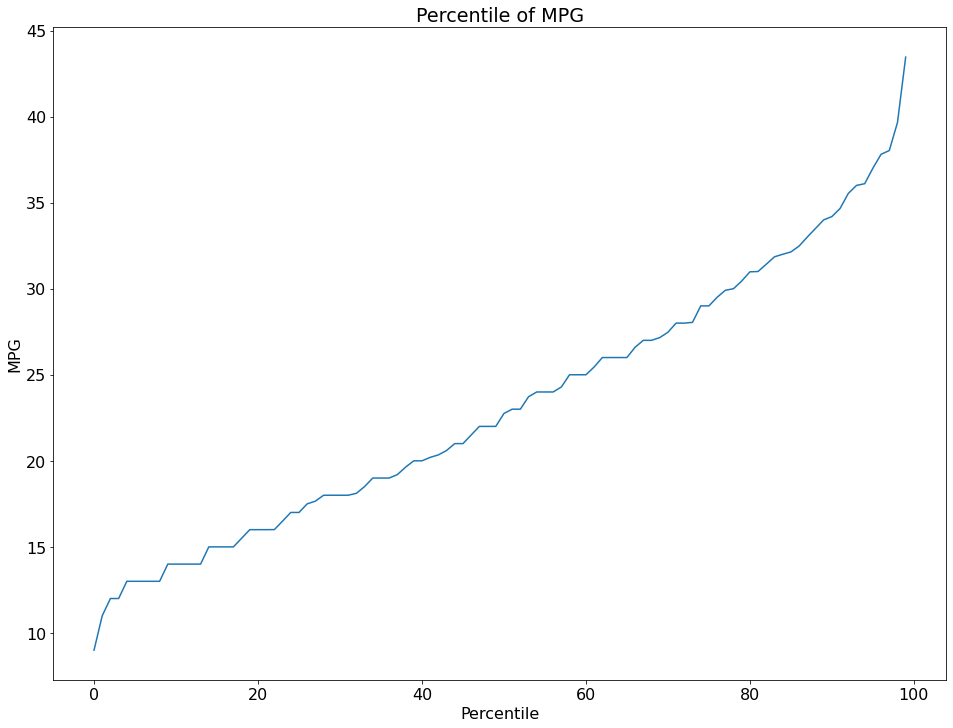

In [13]:
P5_percentile = range(100)
P5 = np.percentile(df["mpg"], P5_percentile)
fig, ax = plt.subplots(1, 1)
ax.plot(P5_percentile, P5)
ax.set_title("Percentile of MPG")
ax.set_xlabel("Percentile")
ax.set_ylabel("MPG")
plt.show()

## Problem 6: 
## 1. Calculate the linear regression model of each feature with respect to mpg. 

In [14]:
SLR_dict = {}
y = df.iloc[:, 0].values.reshape(-1, 1)
for i in range(1, 6):
    X = df.iloc[:, i].values.reshape(-1, 1)
    lm = LinearRegression()
    lm.fit(X, y)
    SLR_dict[df.columns[i]] = lm

## 2. Create an empty data frame to record linear model coefficients, root mean squared error, and relative accuracy.

In [15]:
SLR_summary = pd.DataFrame(columns = df.columns[1:], 
                           index = ["A (Intercept)", "B (Slope)", "RMSE", "Relative Accruacy"])
for i in df.columns[1:]:
    temp_lm = SLR_dict[i]
    SLR_summary.loc["A (Intercept)", i] = round(temp_lm.intercept_[0], 2)
    SLR_summary.loc["B (Slope)", i] = round(temp_lm.coef_[0][0], 2)
    
    pred_Y = temp_lm.predict(df.loc[:, i].values.reshape(-1, 1))
    temp_RMSE = np.sqrt(metrics.mean_squared_error(y, pred_Y))
    SLR_summary.loc["RMSE", i] = round(temp_RMSE, 2)
    
    mean_Y = np.mean(y)
    SLR_summary.loc["Relative Accruacy", i] = round(temp_RMSE / mean_Y, 2)

SLR_summary

,cyl,dis,hor,wei,acc
A (Intercept),42.92,35.12,39.94,46.22,4.83
B (Slope),-3.56,-0.06,-0.16,-0.01,1.2
RMSE,4.9,4.62,4.89,4.32,7.06
Relative Accruacy,0.21,0.2,0.21,0.18,0.3


## 3. Plot the scatter plot in a row together with linear regression line, respectively, as red. 

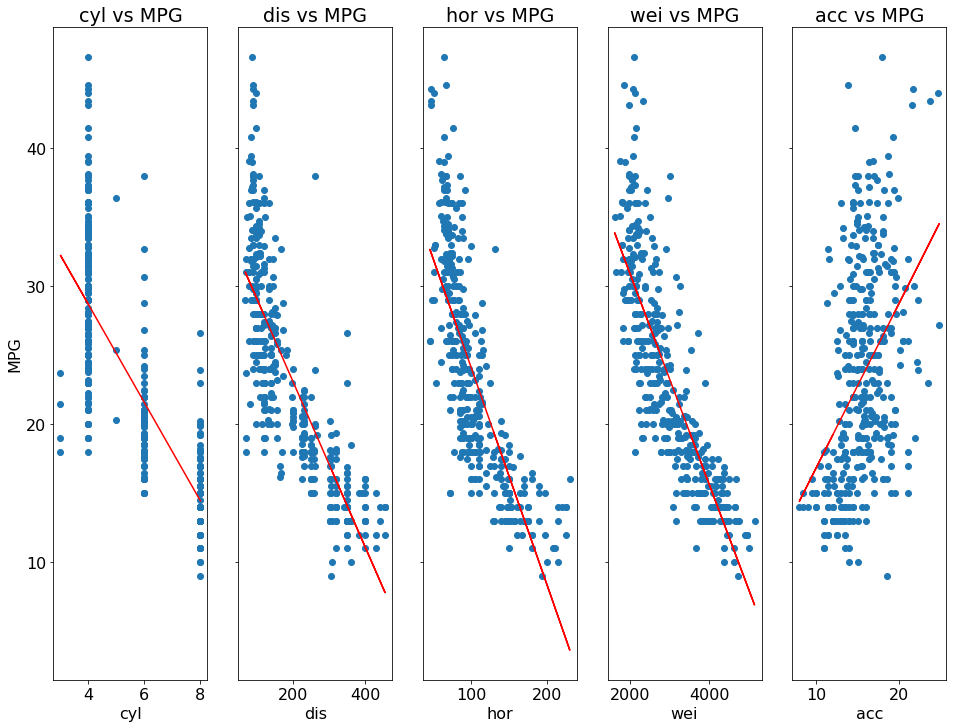

In [16]:
fig, axs = plt.subplots(1, 5, sharey = True)
for i in range(1, 6):
    feature = df.columns[i]
    temp_lm = SLR_dict[feature]
    axs[i - 1].scatter(df.loc[:, feature], df.iloc[:, 0])
    axs[i - 1].set_title(feature + " vs MPG")
    axs[i - 1].set_xlabel(feature)
    pred_Y = pd.DataFrame(temp_lm.predict(df.loc[:, feature].values.reshape(-1, 1)))
    axs[i - 1].plot(df.loc[:, feature], pred_Y[0], color = "red")
    
axs[0].set_ylabel("MPG")
plt.show()

## Problem 7: Calculate the quantile for 33% and 66%. Then classified entire data frame into three classes. 
1. Filter those data have mpg smaller than 33% quantile as LOWmpg. 
2. Filter those data have mpg between 33% and 66% quantile as MEDmpg. 
3. Filter those data have mpg larger than 66% quantile as HIGHmpg.

In [17]:
Q33, Q66 = df["mpg"].quantile([0.33, 0.66])
LOWmpg = df[df["mpg"] <= Q33]
MEDmpg = df[(df["mpg"] > Q33) & (df["mpg"] <= Q66)]
HIGHmpg = df[df["mpg"] > Q66]

## Problem 8: Plot the histogram of each features for both LOWmpg and HIGHmpg side by side.

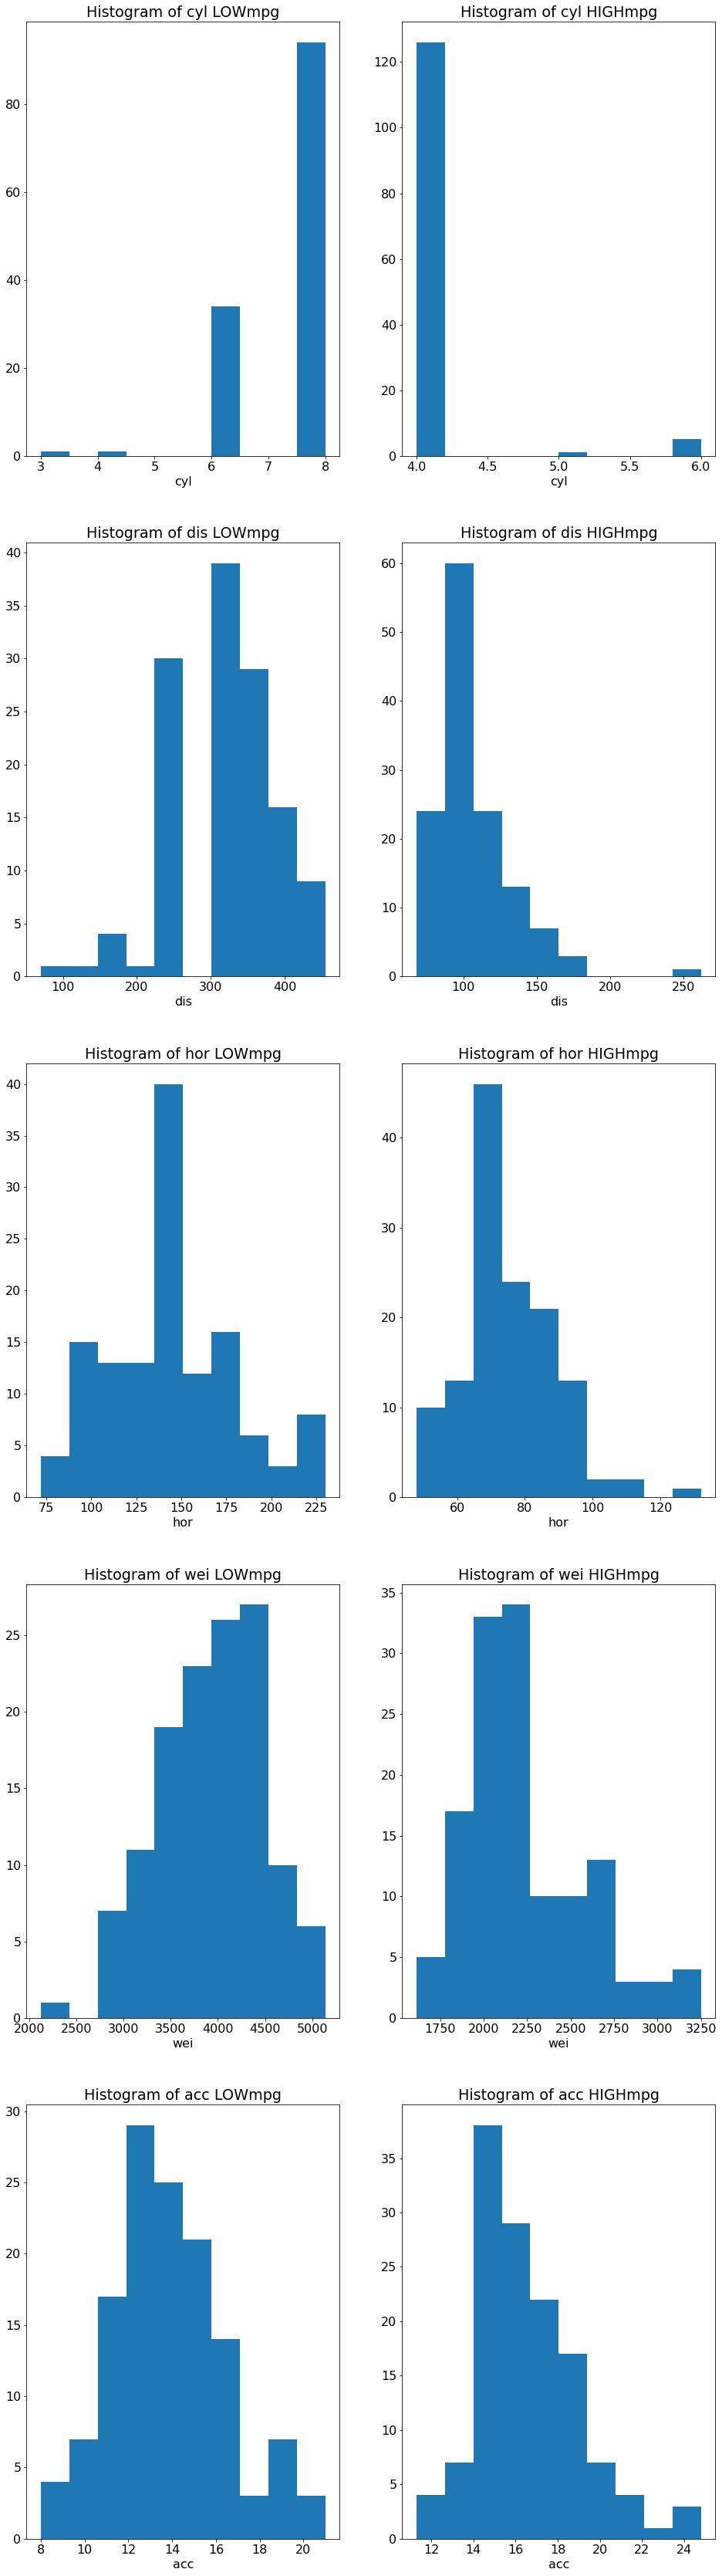

In [18]:
fig, axs = plt.subplots(5, 2, figsize = (16, 60))
for i in range(1, 6):
    feature = df.columns[i]
    axs[i - 1][0].hist(LOWmpg.loc[:, feature])
    axs[i - 1][1].hist(HIGHmpg.loc[:, feature])
    axs[i - 1][0].set_title("Histogram of " + feature + " LOWmpg")
    axs[i - 1][1].set_title("Histogram of " + feature + " HIGHmpg")
    axs[i - 1][0].set_xlabel(feature)
    axs[i - 1][1].set_xlabel(feature)
plt.show()

## Problem 9: Create two empty data frames to record the Mean, Standard Deviation, and Confidence Interval for both LOWmpg and HIGHmog for each feature

In [19]:
def CI(df):
    q = norm.ppf(0.95)
    error_margin = q * np.std(df) / np.sqrt(len(df))
    df_mean = np.mean(df)
    low = round(df_mean - error_margin, 2)
    high = round(df_mean + error_margin, 2)
    return (low, high)

features_stat_LOWmpg = LOWmpg[features].agg(["mean", "std", CI])
features_stat_LOWmpg

,cyl,dis,hor,wei,acc
mean,7.40769,315.308,145.623,3937.33,13.7785
std,1.00923,71.114,35.841,557.186,2.64929
CI,"(7.26, 7.55)","(305.09, 325.53)","(140.47, 150.77)","(3857.26, 4017.4)","(13.4, 14.16)"


In [20]:
features_stat_HIGHmpg = HIGHmpg[features].agg(["mean", "std", CI])
features_stat_HIGHmpg

,cyl,dis,hor,wei,acc
mean,4.08333,106.402,74.3939,2226.09,16.5606
std,0.391546,26.4222,13.8843,345.878,2.51999
CI,"(4.03, 4.14)","(102.63, 110.17)","(72.41, 76.37)","(2176.76, 2275.42)","(16.2, 16.92)"


## Problem 10: 
## 1. Centralize and Rescale the numerical features and binary the categorical features.

In [21]:
from sklearn.preprocessing import StandardScaler
s_df = df.copy()
for i in features[1:]:
    SS = StandardScaler().fit(s_df[i].values.reshape(-1, 1))
    s_df[i] = SS.transform(s_df[i].values.reshape(-1, 1))

s_df = pd.get_dummies(s_df, prefix = "cyl", columns = ["cyl"])

Q33, Q66 = df["mpg"].quantile([0.33, 0.66])
s_LOWmpg = s_df[s_df["mpg"] <= Q33]
s_MEDmpg = s_df[(s_df["mpg"] > Q33) & (s_df["mpg"] <= Q66)]
s_HIGHmpg = s_df[s_df["mpg"] > Q66]

## 2. Convert mpg from numerical to character for all three classes.

In [22]:
s_LOWmpg.loc[:, "mpg"] = "Low"
s_MEDmpg.loc[:, "mpg"] = "Med"
s_HIGHmpg.loc[:, "mpg"] = "High"

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


## 3. Randomly sample from each class. 80% as training set and 20% as test set. Set the seed so that we can generate the same result for each time we run the code. 
Combined the training sets from three classes as one training sets data frame. And, do the same thing for the test test. Thus, we have equally pick from three classes to minimize the bias toward any class.

In [23]:
from sklearn.model_selection import train_test_split
training_data = pd.DataFrame()
test_data = pd.DataFrame()
mpg_list = ["s_LOWmpg", "s_MEDmpg", "s_HIGHmpg"]
for i in range(3):
    temp_df = eval(mpg_list[i])
    temp_training, temp_test = train_test_split(temp_df, train_size = 0.8, random_state = 20211217 + i)
    training_data = pd.concat([training_data, temp_training])
    test_data = pd.concat([test_data, temp_test])

X_training = training_data.drop("mpg", axis = 1)
y_training = training_data["mpg"]
X_test = test_data.drop("mpg", axis = 1)
y_test = test_data["mpg"]

## 4. kNN classifier and train at k = 5. First, use training set for train and training set for test. Then, use training set for train and test set for test.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_training, y_training)
pred_training = knn_model.predict(X_training)
pred_test = knn_model.predict(X_test)

## 5. Calculate accuracy of prediction for both training set and test set. Then, generate a table and compare the accuracy values.

In [25]:
acctable_k_5 = pd.DataFrame(index = ["Overall Accuracy"], columns = ["Training", "Test"])
acctable_k_5.loc["Overall Accuracy", "Test"] = round(np.mean(pred_test == y_test)*100, 2)
acctable_k_5.loc["Overall Accuracy", "Training"] = round(np.mean(pred_training == y_training)*100, 2)
acctable_k_5

,Training,Test
Overall Accuracy,80.19,68.35


## 6. Create confusion matrix and calculate global performance for both training set and test set.

In [26]:
conf_training = pd.DataFrame(metrics.confusion_matrix(y_training, pred_training, normalize = "true", 
                                                      labels = ["Low", "Med", "High"]),
                             index = ["Low", "Med", "High"], columns = ["Low", "Med", "High"])
conf_training = round(conf_training*100, 2)
conf_training.index.name = "True"
conf_training.columns.name = "Predicted"
conf_training

Predicted,Low,Med,High
True,,,
Low,83.65,15.38,0.96
Med,7.69,70.19,22.12
High,0.00,13.33,86.67


In [27]:
conf_test = pd.DataFrame(metrics.confusion_matrix(y_test, pred_test, normalize = "true", 
                                                      labels = ["Low", "Med", "High"]),
                             index = ["Low", "Med", "High"], columns = ["Low", "Med", "High"])
conf_test = round(conf_test*100, 2)
conf_test.index.name = "True"
conf_test.columns.name = "Predicted"
conf_test

Predicted,Low,Med,High
True,,,
Low,76.92,23.08,0.00
Med,11.54,53.85,34.62
High,0.00,25.93,74.07


## Problem 11: 
## 1. Create two empty data frames to record accuracy prediction and Performance for both training and test under different k values.

In [28]:
k = [3, 5, 7, 9, 11, 13, 15, 17, 19, 29, 39]
AccTraining = pd.DataFrame({"k": k, "Accuracy" : np.zeros(len(k)), "Margin": np.zeros(len(k))})
AccTest = pd.DataFrame({"k": k, "Accuracy" : np.zeros(len(k)), "Margin": np.zeros(len(k))})

for i in range(len(k)):
    knn_model = KNeighborsClassifier(n_neighbors = k[i])
    knn_model.fit(X_training, y_training)
    globals()["pred_training_k_" + str(k[i])] = knn_model.predict(X_training)
    globals()["pred_test_k_" + str(k[i])] = knn_model.predict(X_test)
    
    temp_training_perf = np.mean(eval("pred_training_k_" + str(k[i])) == y_training)
    temp_test_perf = np.mean(eval("pred_test_k_" + str(k[i])) == y_test)
    AccTraining.iloc[i, 1] = round(temp_training_perf*100, 2) 
    AccTest.iloc[i, 1] = round(temp_test_perf*100, 2)
    AccTraining.iloc[i, 2] = round(np.sqrt(temp_training_perf * (1-temp_training_perf) / len(y_training))*100, 2)
    AccTest.iloc[i, 2] = round(np.sqrt(temp_test_perf * (1-temp_test_perf) / len(y_test))*100, 2)

## 2. Plot the k value against accuracy of prediction.

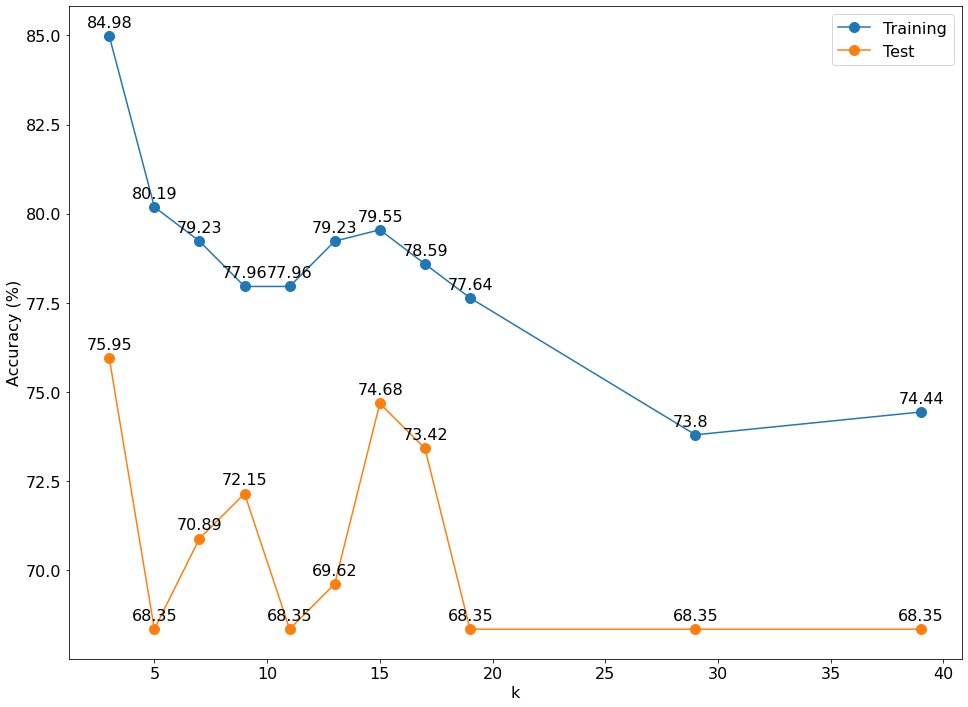

In [29]:
fig, ax = plt.subplots(1, 1)
ax.plot(AccTraining.k, AccTraining.Accuracy, label = "Training", marker = '.', ms = 20)
ax.plot(AccTest.k, AccTest.Accuracy, label = "Test", marker = '.', ms = 20)
for i in range(len(k)):
    ax.annotate(AccTraining.iloc[i, 1], (AccTraining.iloc[i, 0] - 1, AccTraining.iloc[i, 1] + 0.25))
    ax.annotate(AccTest.iloc[i, 1], (AccTest.iloc[i, 0] - 1, AccTest.iloc[i, 1] + 0.25))
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()